In [1]:
import numpy as np
import matplotlib.pyplot as plt

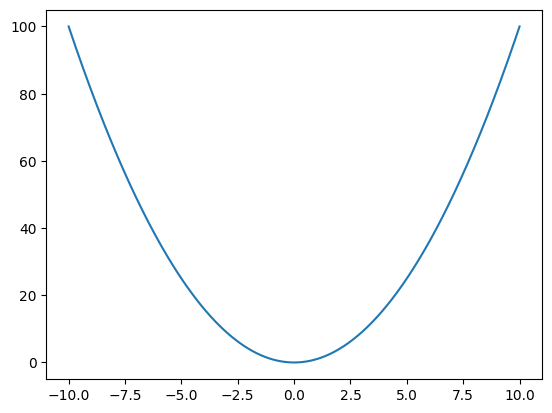

In [2]:
def plot_function(func):
  x_values = np.linspace(-10, 10, 1000)
  y_values = [func(x) for x in x_values]
  plt.plot(x_values, y_values)

plot_function(lambda x: x**2) #y = x**2

In [3]:
def derivative(f, x):
  delta_x = 0.0000001
  return (f(x+delta_x) - f(x))/delta_x

print(derivative(lambda x:x**2, -1))

-1.999999899027216


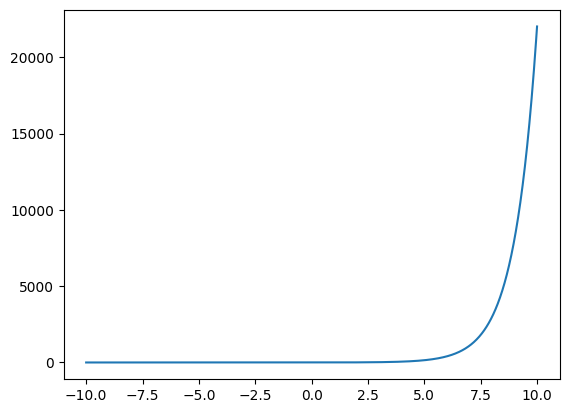

In [4]:
def plot_derivative(func):
  x_values = np.linspace(-10, 10, 1000)
  delta = 0.0001
  y_values = (func(x_values + delta) - func(x_values)) / delta
  plt.plot(x_values, y_values)

plot_derivative(lambda x:np.exp(x))

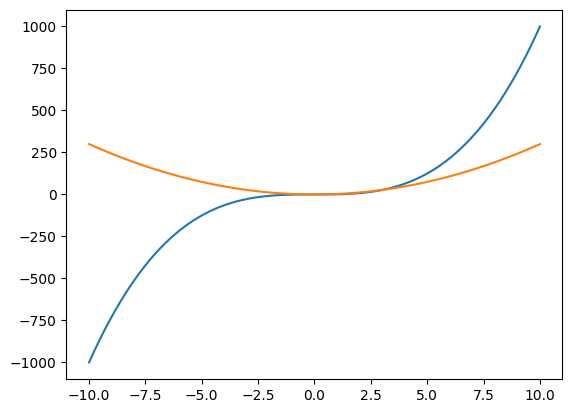

In [5]:
plot_function(lambda x: x**3)
plot_derivative(lambda x: x**3)

# partial derivative

In [6]:
def get_partials(f, x, y):
  delta = 0.0001

  dfx = (f(x+delta, y) - f(x,y)) / delta
  dfy = (f(x, y+delta) - f(x,y)) / delta

  return dfx, dfy

In [7]:
get_partials(lambda x,y : x**2 + y**2, 3, 4)

(6.000099999994291, 8.00009999998963)

In [8]:
def get_grid(axis_lim):
    x= np.linspace(-axis_lim,axis_lim,20)
    y= np.linspace(-axis_lim,axis_lim,20)
    g1,g2 = np.meshgrid(x,y)
    return g1,g2

In [9]:
axis_lim = 10
g1, g2 = get_grid(axis_lim)


In [10]:
def get_partials_from_grid(func,g1,g2):
    U = np.zeros(g1.shape) # df/dx
    V = np.zeros(g2.shape) # df/dy
    for rows_id,(row_x,row_y) in enumerate(zip(g1,g2)):
        for col_id,(x,y) in enumerate(zip(row_x,row_y)):
            fx,fy = get_partials(func, x, y)
            U[rows_id,col_id] = fx
            V[rows_id,col_id] = fy
    return U,V

In [11]:
def plot_gradients(g1,g2,U,V):
    fig,ax=plt.subplots()
    q=ax.quiver(g1,g2,U,V)
    plt.show()


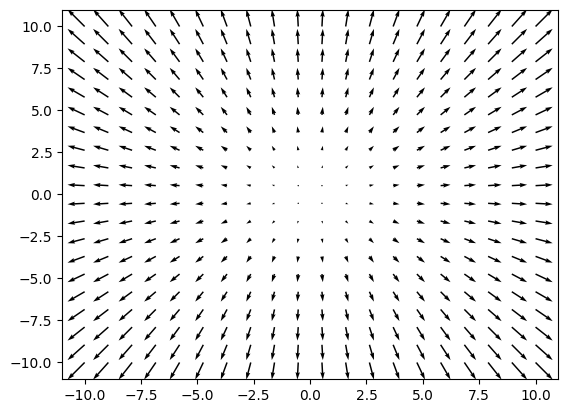

In [12]:
func = lambda x,y : x**2 + y**2
axis_lim = 10
g1,g2 = get_grid(axis_lim)
U,V = get_partials_from_grid(func,g1,g2)
plot_gradients(g1,g2,U,V)

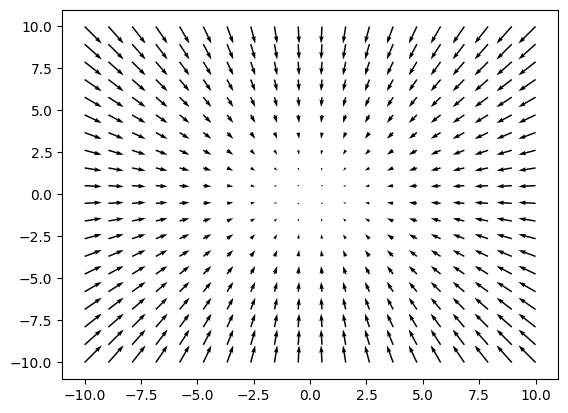

In [13]:
func = lambda x,y : x**2 + y**2
axis_lim = 10
g1,g2 = get_grid(axis_lim)
U,V = get_partials_from_grid(func,g1,g2)
plot_gradients(g1,g2,-U,-V)

In [14]:
# f = (x -5) **2

learning_rate = 0.1
x = -9
for i in range(100):
  # find gradient
  dx = derivative(lambda x: (x-5)**2, x)
  x = x - learning_rate*dx
print(x)

4.99999994714815


In [15]:
dx = derivative(lambda x: (x-5)**2, x)
x = x - learning_rate*dx
print(x)

4.99999994771852


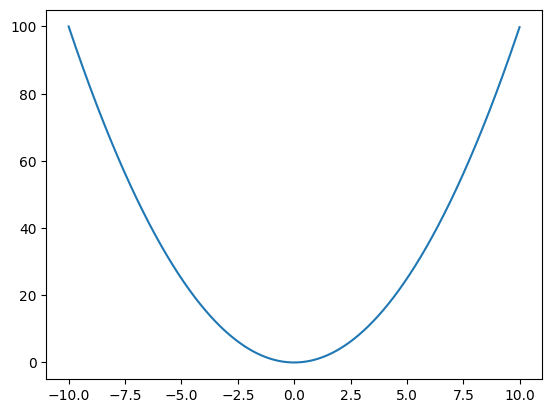

In [16]:
def f(x):
  return x**2

x = np.arange(-10, 10, 0.01)
y = f(x)

plt.figure()
plt.plot(x, y)
plt.show()

In [17]:
def derivative(x, f):
  delta = 0.0001
  return (f(x + delta) - f(x)) / delta

def one_step_gd(x, f, lr): # lr -> learning rate, same as \eta
  grad = derivative(x, f)
  new_x = x - lr * grad
  new_fx = f(new_x)
  return new_x, new_fx, grad

In [18]:
x0 = -8
num_steps = 0 # Same as t in the update equation

xs = []
fxs = []
grads = []

-1.0737851131141714


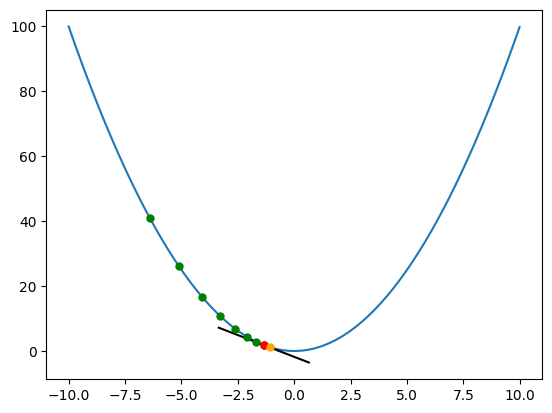

In [27]:

plt.figure()

x = np.arange(-10, 10, 0.01)
y = f(x)
plt.plot(x, y)

new_x, new_fx, grad = one_step_gd(x0, f, 0.1)
xs.append(new_x)
fxs.append(new_fx)
grads.append(grad)
num_steps += 1

t_c = f(x0) - grads[-1] * x0
delta = 2.
t_x = np.arange(x0 - delta, x0 + delta, 0.01)
t_y = grads[-1] * t_x + t_c
plt.plot(t_x, t_y, color="black")

for i in range(num_steps-1):
    plt.plot(xs[i], fxs[i], marker="o", markersize=5, markeredgecolor="green", markerfacecolor="green")

plt.plot(x0, f(x0), marker="o", markersize=5, markeredgecolor="red", markerfacecolor="red")
plt.plot(xs[-1], fxs[-1], marker="o", markersize=5, markeredgecolor="orange", markerfacecolor="orange")

print(new_x)
x0 = new_x
plt.show()
